In [328]:
#Author: Aaron Hertner
#Versino: Python Base 3.8
#Purpose: To build and test classification models in the Microsoft Azure environment 

In [329]:
import warnings

#graphing and data analysis
from matplotlib.cbook import mplDeprecation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive
import numpy as np
import pandas as pd
import seaborn as sb

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings("ignore",category=mplDeprecation)

In [330]:
#load data
df = pd.read_csv('../_datasets/heart.csv')
pd.options.display.max_columns = None
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [331]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [332]:
sc = StandardScaler()

df_y = df.target
df_x = df.drop(['target'], axis=1)

df_fixed = pd.DataFrame(sc.fit_transform(df_x), columns=df_x.columns)
df_fixed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


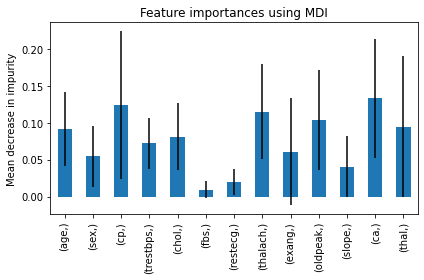

In [333]:
#build and train Forest Classifier to determine feature importance

forest_train_x, forest_test_x, forest_train_y, forest_test_y = train_test_split(df_fixed, df_y, test_size = 0.2, random_state = 0) 

feature_names = [df_fixed.columns]
forest = RandomForestClassifier(random_state = 0)
forest.fit(forest_train_x, forest_train_y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [334]:
print(df_fixed.columns[2])
print(df_fixed.columns[11])
print(df_fixed.shape)

cp
ca
(303, 13)


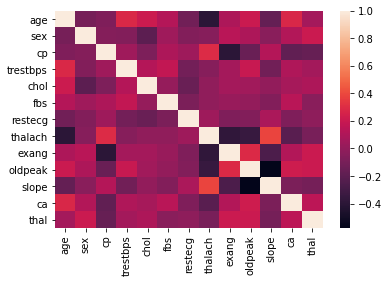

In [335]:
sb.heatmap(df_fixed.corr())

In [336]:
df_cp_tha = df_fixed[['cp','thalach']]
df_cp_tha.head()

,cp,thalach
0,1.973123,0.015443
1,1.002577,1.633471
2,0.032031,0.977514
3,0.032031,1.239897
4,-0.938515,0.583939


In [1]:
#split final datafram into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(df_cp_tha, df_y, test_size = 0.2, random_state=0)

svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

def on_change(elevation, rotation):
    fig = plt.figure(1, figsize=(5,5))
    plt.clf()
    ax = fig.add_axes(Axes3D(fig, elev=elevation, azim=rotation))
    ax.scatter(x_test['cp'], x_test['thalach'], y_test)
    plt.show()
    return elevation, rotation

interactive_plot = interactive(on_change, elevation=(0, 90, 0.1), rotation=(0, 90 ,0.1))
output = interactive_plot.children[-1]
output.layout.height = '360px'
interactive_plot

NameError: name 'train_test_split' is not defined

Text(2, 2.339585002085407, 'Moderate Chest Pain, High Heart Rate')

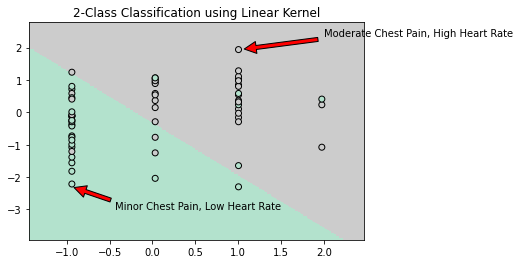

In [338]:
x_min, x_max = df_cp_tha['cp'].min() - 0.5, df_cp_tha['cp'].max() + 0.5
y_min, y_max = df_cp_tha['thalach'].min() - 0.5, df_cp_tha['thalach'].max() + 0.5
step_size = 0.02

xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

mesh = svm.predict(np.c_[xx.ravel(), yy.ravel()])

mesh = mesh.reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh, cmap=plt.cm.get_cmap('Pastel2'))
plt.scatter(x_test['cp'], x_test['thalach'], c = y_test, edgecolors = 'k',cmap=plt.cm.get_cmap('Pastel2'))
plt.title('2-Class Classification using Linear Kernel')
plt.axis('tight')

plt.annotate('Minor Chest Pain, Low Heart Rate', 
             xy = (x_test['cp'].min(), x_test['thalach'].min()), 
             xytext = (x_test['cp'].min() + 0.5, x_test['thalach'].min() - 0.7), 
             arrowprops = dict(facecolor ='r', shrink = 0.05))

plt.annotate('Moderate Chest Pain, High Heart Rate', 
             xy = (1.02, x_test['thalach'].max()), 
             xytext = (2, x_test['thalach'].max()+0.4), 
             arrowprops = dict(facecolor = 'r', shrink = 0.05))

In [339]:
print('SVC score         : %.2f'%svm.score(x_test, y_test))

# The mean squared error - 0 is best possible
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

#R2 score - 1 is best possible
print('R2 Score          : %.2f'% r2_score(y_test, y_pred))

SVC score         : 0.80
Mean squared error: 0.20
R2 Score          : 0.20


In [340]:
#print the classification report
print(classification_report(y_test, y_pred, target_names=['CP', 'Thalach']))

              precision    recall  f1-score   support

          CP       0.76      0.81      0.79        27
     Thalach       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

